In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx
import random
import math

In [2]:
dataset = pd.read_csv('dataset_yunani_charging.csv')
dataset = dataset[dataset['location'] != 'Charging Station']
dataset

,parameter,location,coordinates-x,coordinates-y,demand
0,O,Tsimiski 30,40.633443,22.941847,0.000
1,C1,Vas. Irakleiou 26,40.634928,22.941218,0.300
2,C2,Mitropoleos 34,40.632620,22.941690,15.000
3,C3,Leof. Nikis 13,40.632470,22.941357,0.700
4,C4,Karolou Ntil 2,40.631272,22.941907,0.365
5,C5,Geor. Stavrou 2,40.633118,22.943918,0.818
6,C6,Vas. Irakleiou 53,40.633603,22.943912,0.297
7,C7,Karolou Ntil 26,40.633640,22.944379,0.240
8,C8,Dragoumi 19,40.635333,22.944464,1.000
9,C9,Ethnikis Amunis 22,40.629084,22.951692,0.297


In [3]:
coordinates = {row['parameter']: (row['coordinates-x'], row['coordinates-y']) for _, row in dataset.iterrows()}
print(coordinates)

{'O': (40.6334432801894, 22.9418467953214), 'C1': (40.6349279166224, 22.9412182927558), 'C2': (40.6326201426558, 22.9416903933331), 'C3': (40.63247031267, 22.9413574091084), 'C4': (40.6312719481036, 22.9419066106642), 'C5': (40.6331178653117, 22.9439183260072), 'C6': (40.6336027657025, 22.9439123688964), 'C7': (40.6336401535569, 22.9443790818286), 'C8': (40.6353327492221, 22.9444640664858), 'C9': (40.629084109805, 22.951692010664), 'C10': (40.6284246574699, 22.947519714663), 'C11': (40.6315705856702, 22.9442026953213), 'C12': (40.6299074507659, 22.9465806529926), 'C13': (40.629469164238, 22.9473739953211), 'C14': (40.6285775513548, 22.9486477848319), 'C15': (40.6328140608705, 22.9464923664857), 'C16': (40.6373190748585, 22.9409660891561), 'C17': (40.6369786027788, 22.9420327548432), 'C18': (40.6363159717814, 22.942701352993), 'C19': (40.6372170978517, 22.9387638233984), 'C20': (40.638374458554, 22.9387104953217), 'C21': (40.6367745704391, 22.9382767376502), 'C22': (40.6378270088688, 22

In [ ]:
coordinates = {
    'O': (0, 0),
    'C1': (30, 0),
    'C2': (0, 40),
    'C3': (0, 20),
    'C4': (15,25),
    'C5':(40,30),
    'C6':(30,30),
    'C7':(35,15),
    'O1': (0,0)
    }

In [4]:
def plot_graph(coordinates, annotate=True):
    """
    Makes a plot of all cities.
    Input: city_coordinates; dictionary of all cities and their coordinates in (x,y) format
    """
    names = []
    x = []
    y = []
    plt.figure(dpi=250)
    for ix, coord in coordinates.items():
        names.append(ix)
        x.append(coord[0])
        y.append(coord[1])
        if annotate:
            plt.annotate(ix, xy=(coord[0], coord[1]), xytext=(20, -20),
                        textcoords='offset points', ha='right', va='bottom',
                        bbox=dict(boxstyle='round,pad=0.5', fc='w', alpha=0.5),
                        arrowprops=dict(arrowstyle = '->', connectionstyle='arc3,rad=0'))
    plt.scatter(x,y,c='r',marker='o')

In [5]:
def plot_route(coordinates, route, route_in_title=True, annotation_font_size=8):
    """
    Takes the coordinates of the cities and the guessed path and
    makes a plot connecting the cities in the guessed order.
    """
    # Create the plot
    plt.figure(dpi=250)
    # Plot depot, customers, and charging stations with different colors
    for point in route:
        if 'O' in point:
            plt.scatter(coordinates[point][0], coordinates[point][1], c='blue', marker='s', label='Depot' if 'O' == point else 'End Depot')
        elif 'F' in point:
            plt.scatter(coordinates[point][0], coordinates[point][1], c='green', marker='^', label='Charging Station')
        else:
            plt.scatter(coordinates[point][0], coordinates[point][1], c='red', marker='o', label='Customer')

    # Annotate points with a smaller font size
    for name, (x, y) in coordinates.items():
        plt.annotate(name, xy=(x, y), xytext=(5, 5), textcoords='offset points', fontsize=annotation_font_size)

    # Draw the route
    for i in range(len(route)-1):
        plt.plot(
            [coordinates[route[i]][0], coordinates[route[i+1]][0]],
            [coordinates[route[i]][1], coordinates[route[i+1]][1]],
            'c--', lw=1
        )

    # Adding a legend to the plot if it's the first point being plotted
    handles, labels = plt.gca().get_legend_handles_labels()
    by_label = dict(zip(labels, handles))
    plt.legend(by_label.values(), by_label.keys())

    # Setting title
    if route_in_title:
        plt.title("Vehicle Route: [%s]" % (' -> '.join([str(x) for x in route])))

    # Display the plot
    plt.show()

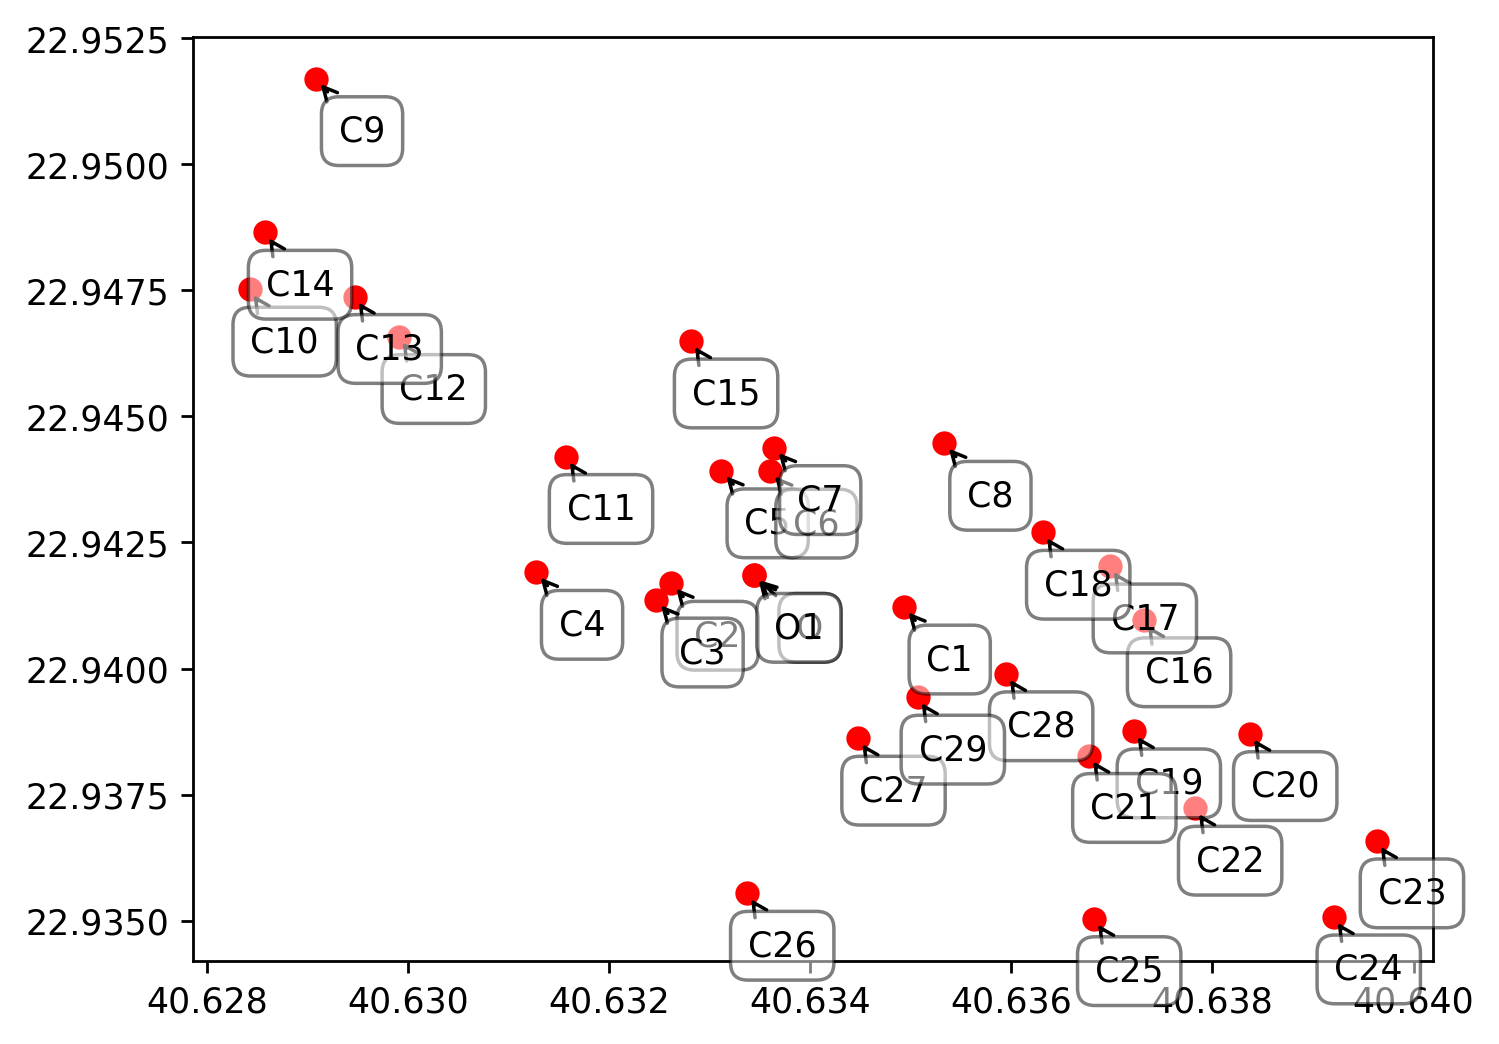

In [6]:
plot_graph(coordinates)

In [7]:
# Create a list of customer codes
customers = customers = [row['parameter'] for _, row in dataset.iterrows() if row['parameter'].startswith('C')]
print(customers)

#Create a list of charging station codes
nodes = [row['parameter'] for _, row in dataset.iterrows()]
print (nodes)

#Creat a list of demands
demands = {row['parameter']: (row['demand']) for _, row in dataset.iterrows()}
print (demands)

start_depot = 'O'
end_depot = 'O1'

['C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9', 'C10', 'C11', 'C12', 'C13', 'C14', 'C15', 'C16', 'C17', 'C18', 'C19', 'C20', 'C21', 'C22', 'C23', 'C24', 'C25', 'C26', 'C27', 'C28', 'C29']
['O', 'C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9', 'C10', 'C11', 'C12', 'C13', 'C14', 'C15', 'C16', 'C17', 'C18', 'C19', 'C20', 'C21', 'C22', 'C23', 'C24', 'C25', 'C26', 'C27', 'C28', 'C29', 'O1']
{'O': 0.0, 'C1': 0.3, 'C2': 15.0, 'C3': 0.7, 'C4': 0.365, 'C5': 0.818, 'C6': 0.297, 'C7': 0.24, 'C8': 1.0, 'C9': 0.297, 'C10': 0.3, 'C11': 0.15, 'C12': 0.3, 'C13': 0.228, 'C14': 15.0, 'C15': 0.31, 'C16': 0.228, 'C17': 0.3, 'C18': 1.0, 'C19': 0.31, 'C20': 0.297, 'C21': 0.3, 'C22': 0.15, 'C23': 1.0, 'C24': 0.228, 'C25': 0.3, 'C26': 0.15, 'C27': 0.24, 'C28': 0.818, 'C29': 1.0, 'O1': 0.0}


In [ ]:
#Notation
#charging_stations = ['F1', 'F2','F3']
customers = ['C1','C2','C3','C4','C5','C6','C7']
CF = ['F1', 'F2','C1','C2']
nodes = ['O','C1','C2','C3','C4','C5','C6','C7','O1']
end_depot = 'O1' #start depot
start_depot = 'O'
FO = ['F1', 'F2','C1','C2','O']
Oend = 'O1' #end depot
OF = ['F1', 'F2','C1','C2','O']
Vehicle = ['V1']

In [8]:
Qm = 756 #kWh (Fuel capacity)
speed = {(i, j): 40 for i in nodes for j in nodes if i != j} #m/s
ef = 0.48 #Efficiency
mas = 3629 #kg vehicle mass
g = 9.8 #m/s2
fr = 0.01 # rolling resistance
theta_ij = {(i, j): 0 for i in nodes for j in nodes if i != j}
rho = 1.204 #air density kg/m3
cd = 0.48 #coefficient of drug
A = 5 #m2 frontal surface
accel = 0 #m/s2 accelaration
#demands = {'C1': 453, 'C2': 1360,'C3':500,'C4':200,'C5':300,'C6':500,'C7':200,'O1':0}
maxload = 9073
#charge_time = 0.5 #charging time

In [ ]:
route = ['O','C3','C2','C4','C1','C5','C6','C7','O1']

In [9]:
route = ['O', 'C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9',
         'C10', 'C11', 'C12', 'C13', 'C14', 'C15', 'C16', 'C17', 'C18',
         'C19', 'C20', 'C21', 'C22', 'C23', 'C24', 'C25', 'C26', 'C27', 'C28',
         'C29', 'O1']

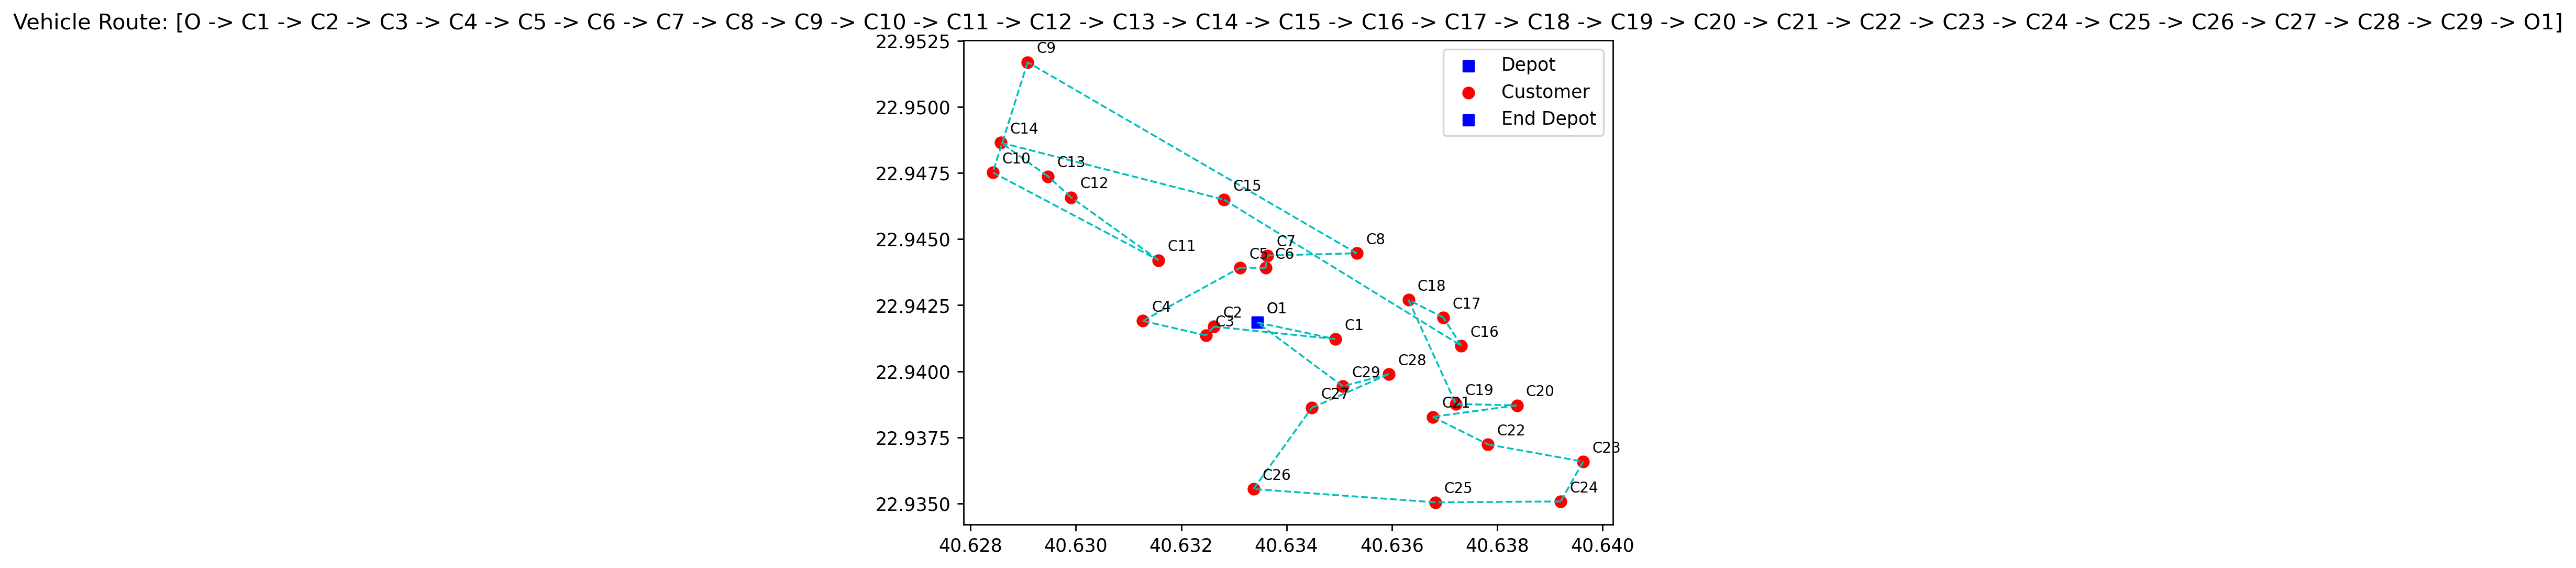

In [10]:
plot_route(coordinates,route)

# **CALCULATE LOAD**

In [11]:
def calculate_route_load(route, demands, start_depot='O'):
    load = {start_depot: 0}
    for i, j in zip(route[:-1], route[1:]):
        load[j] = load[i] + demands.get(j, 0)
    return load

In [12]:
loads = calculate_route_load(route, demands)
loads

{'O': 0,
 'C1': 0.3,
 'C2': 15.3,
 'C3': 16.0,
 'C4': 16.365,
 'C5': 17.183,
 'C6': 17.48,
 'C7': 17.72,
 'C8': 18.72,
 'C9': 19.017,
 'C10': 19.317,
 'C11': 19.467,
 'C12': 19.767,
 'C13': 19.995,
 'C14': 34.995000000000005,
 'C15': 35.30500000000001,
 'C16': 35.53300000000001,
 'C17': 35.833000000000006,
 'C18': 36.833000000000006,
 'C19': 37.14300000000001,
 'C20': 37.440000000000005,
 'C21': 37.74,
 'C22': 37.89,
 'C23': 38.89,
 'C24': 39.118,
 'C25': 39.418,
 'C26': 39.568,
 'C27': 39.808,
 'C28': 40.626,
 'C29': 41.626,
 'O1': 41.626}

# **Calculate Time**

In [13]:
from math import radians, sin, cos, sqrt, atan2

# Haversine formula implementation
def haversine(coord1, coord2):
    R = 6371.0  # Earth radius in km
    lat1, lon1 = map(radians, coord1)
    lat2, lon2 = map(radians, coord2)
    
    dlat = lat2 - lat1
    dlon = lon2 - lon1
    
    a = sin(dlat / 2)**2 + cos(lat1) * cos(lat2) * sin(dlon / 2)**2
    c = 2 * atan2(sqrt(a), sqrt(1 - a))
    
    return R * c

In [14]:
def calculate_distance_matrix(coordinates):
    """Calculate the distance matrix for a set of coordinates."""
    distance_matrix = {}
    for node_i, coord_i in coordinates.items():
        for node_j, coord_j in coordinates.items():
                distance_matrix[(node_i, node_j)] = haversine(coord_i, coord_j)*10
    return distance_matrix

In [15]:
distance_matrix = calculate_distance_matrix(coordinates)
distance_matrix

{('O', 'O'): 0.0,
 ('O', 'C1'): 1.7339407667321274,
 ('O', 'C2'): 0.9247537224204352,
 ('O', 'C3'): 1.158029388306601,
 ('O', 'C4'): 2.4149386896205467,
 ('O', 'C5'): 1.7851203487435185,
 ('O', 'C6'): 1.752027645537029,
 ('O', 'C7'): 2.148047529971155,
 ('O', 'C8'): 3.048256125036391,
 ('O', 'C9'): 9.61875023724681,
 ('O', 'C10'): 7.352507979540375,
 ('O', 'C11'): 2.878974074405014,
 ('O', 'C12'): 5.605008674623738,
 ('O', 'C13'): 6.425185520609681,
 ('O', 'C14'): 7.887425941986791,
 ('O', 'C15'): 3.982124452615479,
 ('O', 'C16'): 4.373292907420604,
 ('O', 'C17'): 3.934229948938699,
 ('O', 'C18'): 3.2746693346639093,
 ('O', 'C19'): 4.937268700897531,
 ('O', 'C20'): 6.088471011879965,
 ('O', 'C21'): 4.774570572440115,
 ('O', 'C22'): 6.2392387909982645,
 ('O', 'C23'): 8.192637964316324,
 ('O', 'C24'): 8.584047857826809,
 ('O', 'C25'): 6.86235918290301,
 ('O', 'C26'): 5.317661824866673,
 ('O', 'C27'): 2.9569918842604714,
 ('O', 'C28'): 3.234607722904061,
 ('O', 'C29'): 2.7234121164223772,

In [ ]:
def euclidean_distance(coord1, coord2):
    """Calculate Euclidean distance between two points."""
    return math.sqrt((coord1[0] - coord2[0]) ** 2 + (coord1[1] - coord2[1]) ** 2)

def calculate_distance_matrix(coordinates):
    """Calculate the distance matrix for a set of coordinates."""
    distance_matrix = {}
    for node_i, coord_i in coordinates.items():
        for node_j, coord_j in coordinates.items():
                distance_matrix[(node_i, node_j)] = euclidean_distance(coord_i, coord_j)
    return distance_matrix

# Calculate the distance matrix from the coordinates
distance_matrix = calculate_distance_matrix(coordinates)
distance_matrix

In [17]:
def calculate_travel_time(nodes, distances, speeds):
    travel_time = {}

    # Calculate travel time for all pairs of nodes
    for i in nodes:
        for j in nodes:  # No travel time needed for the same node
                distance = distances.get((i, j), None)
                speed = speeds.get((i, j), None)

                if distance is not None and speed is not None and speed > 0:  # Valid distance and speed
                    travel_time[(i, j)] = distance / speed
                else:
                    # Handle cases where no distance/speed data is available or speed is zero
                    travel_time[(i, j)] = float('inf')  # Infeasible route due to no speed or data

    return travel_time

In [18]:
travel_times = calculate_travel_time(nodes, distance_matrix,speed)
travel_times

{('O', 'O'): inf,
 ('O', 'C1'): 0.043348519168303186,
 ('O', 'C2'): 0.02311884306051088,
 ('O', 'C3'): 0.028950734707665026,
 ('O', 'C4'): 0.060373467240513665,
 ('O', 'C5'): 0.044628008718587964,
 ('O', 'C6'): 0.043800691138425725,
 ('O', 'C7'): 0.05370118824927887,
 ('O', 'C8'): 0.07620640312590977,
 ('O', 'C9'): 0.24046875593117023,
 ('O', 'C10'): 0.18381269948850937,
 ('O', 'C11'): 0.07197435186012535,
 ('O', 'C12'): 0.14012521686559345,
 ('O', 'C13'): 0.16062963801524202,
 ('O', 'C14'): 0.19718564854966977,
 ('O', 'C15'): 0.09955311131538698,
 ('O', 'C16'): 0.1093323226855151,
 ('O', 'C17'): 0.09835574872346747,
 ('O', 'C18'): 0.08186673336659774,
 ('O', 'C19'): 0.12343171752243827,
 ('O', 'C20'): 0.1522117752969991,
 ('O', 'C21'): 0.11936426431100286,
 ('O', 'C22'): 0.15598096977495662,
 ('O', 'C23'): 0.2048159491079081,
 ('O', 'C24'): 0.21460119644567022,
 ('O', 'C25'): 0.17155897957257524,
 ('O', 'C26'): 0.13294154562166682,
 ('O', 'C27'): 0.07392479710651179,
 ('O', 'C28'): 0.

In [19]:
def calculate_departure_times_for_route(route, travel_times, start_depot='O'):
    departure_times = {start_depot: 0}
    for i, j in zip(route[:-1], route[1:]):
                    departure_times[j] = departure_times[i] + travel_times[(i, j)]
    return departure_times

In [20]:
departure_times = calculate_departure_times_for_route(route, travel_times)
departure_times

{'O': 0,
 'C1': 0.043348519168303186,
 'C2': 0.10827018782290285,
 'C3': 0.116436935041254,
 'C4': 0.1517073251733462,
 'C5': 0.21829807670772533,
 'C6': 0.23177827837471152,
 'C7': 0.24167883355019978,
 'C8': 0.2887649899810688,
 'C9': 0.5199031960592005,
 'C10': 0.6098176466771661,
 'C11': 0.7218230868551371,
 'C12': 0.7900456372654622,
 'C13': 0.8107480010950087,
 'C14': 0.8473067037927756,
 'C15': 0.9735504134044253,
 'C16': 1.1446484398355457,
 'C17': 1.169059331815672,
 'C18': 1.1922592533838612,
 'C19': 1.2790172283551005,
 'C20': 1.3112100490603045,
 'C21': 1.3566164050130165,
 'C22': 1.3932522254741466,
 'C23': 1.4453276620008761,
 'C24': 1.4792921982045923,
 'C25': 1.5455171194305581,
 'C26': 1.6420244493908718,
 'C27': 1.7137926918058162,
 'C28': 1.762689640642336,
 'C29': 1.7889857420377246,
 'O1': 1.8570710449482841}

# **Calculate Energy Demand**

In [21]:
def calculate_energy_consumption(nodes, speeds, mas, demands, A, rho, cd, fr, distance, ef, accel, g=9.81):
    energy_consumption = {}

    for i in range(len(nodes)):
        from_node = nodes[i]
        for j in range(len(nodes)):
                to_node = nodes[j]

                # Convert speed to m/s from whatever unit it's in; ensure this isn't resulting in 0
                current_speed = speeds.get((from_node, to_node), 0) * 0.277

                # Calculate forces and power
                load_i = mas + demands.get(from_node, 0)  # Total mass including demand
                rolling_resistance_force = load_i * g * fr
                aerodynamic_drag_force = 0.5 * rho * cd * A * (current_speed ** 2)
                acceleration_force = load_i * accel * 1.1  # Assuming acceleration to desired speed
                power = current_speed * (rolling_resistance_force + aerodynamic_drag_force + acceleration_force) / (ef * 1000)  # Power in kW

                # Handle division by zero for current_speed
                if current_speed > 0:
                    time_in_hours = ((distance[(from_node, to_node)] * 1000) / current_speed) / 3600  # Time in hours
                    energy_consumption[(from_node, to_node)] = power * time_in_hours  # Energy in kWh
                else:
                    # Assign a high value to denote impracticality/impossibility due to zero speed
                    energy_consumption[(from_node, to_node)] = 1000

    return energy_consumption

In [22]:
energy_consumption = calculate_energy_consumption(nodes, speed, mas, demands, A, rho, cd, fr,distance_matrix, ef, accel)
energy_consumption

{('O', 'O'): 1000,
 ('O', 'C1'): 0.5352115175547965,
 ('O', 'C2'): 0.28544160944659885,
 ('O', 'C3'): 0.3574462739328273,
 ('O', 'C4'): 0.7454135837116979,
 ('O', 'C5'): 0.5510090016913283,
 ('O', 'C6'): 0.5407943529311426,
 ('O', 'C7'): 0.6630329019037952,
 ('O', 'C8'): 0.9408982232139138,
 ('O', 'C9'): 2.9689975633710537,
 ('O', 'C10'): 2.2694817660812783,
 ('O', 'C11'): 0.8886463211008101,
 ('O', 'C12'): 1.7300851656581477,
 ('O', 'C13'): 1.9832472706305941,
 ('O', 'C14'): 2.434593666061478,
 ('O', 'C15'): 1.2291532169193469,
 ('O', 'C16'): 1.349894286241099,
 ('O', 'C17'): 1.214369730374017,
 ('O', 'C18'): 1.0107846690742164,
 ('O', 'C19'): 1.523975400245836,
 ('O', 'C20'): 1.8793143758872588,
 ('O', 'C21'): 1.4737557422818963,
 ('O', 'C22'): 1.9258515202975313,
 ('O', 'C23'): 2.5288027606171246,
 ('O', 'C24'): 2.649618354270025,
 ('O', 'C25'): 2.1181886617785586,
 ('O', 'C26'): 1.6413904729248363,
 ('O', 'C27'): 0.912727899439692,
 ('O', 'C28'): 0.9984189433025746,
 ('O', 'C29'): 

In [23]:
def calculate_remaining_battery(route, Q_max, energy_consumption):
    Q = {route[0]: Q_max}

    for i, j in zip(route[:-1], route[1:]):
      Q[j] = Q[i] - energy_consumption[(i, j)]

    return Q

In [24]:
battery_remained = calculate_remaining_battery(route,Qm,energy_consumption)
battery_remained

{'O': 756,
 'C1': 755.4647884824452,
 'C2': 754.6631753551017,
 'C3': 754.5620647303357,
 'C4': 754.1265354496584,
 'C5': 753.3043036768829,
 'C6': 753.1378425202374,
 'C7': 753.015596577052,
 'C8': 752.434211880862,
 'C9': 749.5798910176327,
 'C10': 748.469682890213,
 'C11': 747.0867080985724,
 'C12': 746.2443609369321,
 'C13': 745.9887407879631,
 'C14': 745.5373422249087,
 'C15': 743.9743478024867,
 'C16': 741.8617299487631,
 'C17': 741.5603231495722,
 'C18': 741.2738646825026,
 'C19': 740.2024922676443,
 'C20': 739.8049942415001,
 'C21': 739.244344589873,
 'C22': 738.7919878464121,
 'C23': 738.1490098884548,
 'C24': 737.7295825426208,
 'C25': 736.9118884759871,
 'C26': 735.7202748871151,
 'C27': 734.834148893136,
 'C28': 734.2304058846007,
 'C29': 733.9056867474781,
 'O1': 733.0649027686009}

# **Create Population**

In [25]:
def generate_random_route(depot_start, depot_end, customers):
 # Create a deep copy of the customers list to preserve the original list
    customers_copy = customers[:]
    
    # Shuffle the list to randomize the order of visiting customers
    random.shuffle(customers_copy)
    
    # Construct the route starting with depot_start, followed by the randomized customers, and ending with depot_end
    route = [depot_start] + customers_copy + [depot_end]
    
    return route

In [26]:
random_route = generate_random_route(start_depot, end_depot, customers)
print("Random Route:", random_route)

Random Route: ['O', 'C12', 'C22', 'C18', 'C13', 'C2', 'C23', 'C15', 'C1', 'C28', 'C4', 'C27', 'C8', 'C20', 'C26', 'C10', 'C21', 'C3', 'C5', 'C14', 'C19', 'C7', 'C11', 'C16', 'C25', 'C9', 'C24', 'C29', 'C17', 'C6', 'O1']


In [27]:
def create_population(depot_start, depot_end, customers, population_size):
    # Create a list of random routes to form the population
    return [generate_random_route(depot_start, depot_end, customers) for _ in range(population_size)]

In [28]:
population = create_population(start_depot, end_depot, customers, 100)

# Print the population
for i, route in enumerate(population):
    print(f"Route {i+1}: {route}")

Route 1: ['O', 'C22', 'C26', 'C2', 'C24', 'C17', 'C18', 'C20', 'C8', 'C10', 'C14', 'C15', 'C7', 'C11', 'C23', 'C29', 'C12', 'C4', 'C9', 'C21', 'C25', 'C1', 'C19', 'C13', 'C16', 'C27', 'C5', 'C6', 'C28', 'C3', 'O1']
Route 2: ['O', 'C4', 'C20', 'C21', 'C22', 'C15', 'C16', 'C6', 'C12', 'C23', 'C11', 'C18', 'C10', 'C2', 'C13', 'C3', 'C17', 'C5', 'C9', 'C1', 'C24', 'C14', 'C28', 'C29', 'C8', 'C7', 'C19', 'C25', 'C27', 'C26', 'O1']
Route 3: ['O', 'C4', 'C13', 'C23', 'C21', 'C24', 'C19', 'C28', 'C29', 'C8', 'C16', 'C20', 'C12', 'C11', 'C18', 'C6', 'C2', 'C10', 'C7', 'C14', 'C3', 'C26', 'C15', 'C17', 'C27', 'C22', 'C5', 'C9', 'C25', 'C1', 'O1']
Route 4: ['O', 'C9', 'C17', 'C8', 'C1', 'C25', 'C21', 'C28', 'C2', 'C14', 'C22', 'C7', 'C11', 'C4', 'C29', 'C12', 'C16', 'C5', 'C26', 'C15', 'C3', 'C13', 'C27', 'C23', 'C20', 'C18', 'C24', 'C19', 'C10', 'C6', 'O1']
Route 5: ['O', 'C20', 'C18', 'C17', 'C24', 'C4', 'C25', 'C5', 'C26', 'C22', 'C19', 'C15', 'C28', 'C8', 'C12', 'C23', 'C1', 'C29', 'C21', 'C1

# **Objective Function**

In [68]:
energy_cost = 20.38 #$/kWh
hourly_wage = 16.43 #$/hour

In [69]:
def objective_function(route, hourly_wage, energy_cost, travel_times, energy_consumption):

    ctt = sum(hourly_wage * travel_times.get((route[i], route[i+1]), 0) for i in range(len(route) - 1))

    ce = sum(energy_cost * energy_consumption.get((route[i], route[i+1]), 0) 
                      for i in range(len(route) - 1))

    total_cost = ce + ctt

    return total_cost

In [70]:
minimize_cost = objective_function(route,hourly_wage,energy_cost,travel_times,energy_consumption)
minimize_cost

1123.707468963001

In [71]:
def evaluate_population_with_scores(population, hourly_wage,energy_cost, travel_times,energy_consumption):
    population_scores = []
    for route in population:
        cost = objective_function(route,hourly_wage,energy_cost,travel_times,energy_consumption)
        population_scores.append((route, cost))  # Pair each route with its cost in a tuple
    return population_scores

In [72]:
population_scores = evaluate_population_with_scores(population, hourly_wage,energy_cost, travel_times,energy_consumption)

In [73]:
population_scores

[(['O',
   'C22',
   'C26',
   'C2',
   'C24',
   'C17',
   'C18',
   'C20',
   'C8',
   'C10',
   'C14',
   'C15',
   'C7',
   'C11',
   'C23',
   'C29',
   'C12',
   'C4',
   'C9',
   'C21',
   'C25',
   'C1',
   'C19',
   'C13',
   'C16',
   'C27',
   'C5',
   'C6',
   'C28',
   'C3',
   'O1'],
  1107.5156106983968),
 (['O',
   'C4',
   'C20',
   'C21',
   'C22',
   'C15',
   'C16',
   'C6',
   'C12',
   'C23',
   'C11',
   'C18',
   'C10',
   'C2',
   'C13',
   'C3',
   'C17',
   'C5',
   'C9',
   'C1',
   'C24',
   'C14',
   'C28',
   'C29',
   'C8',
   'C7',
   'C19',
   'C25',
   'C27',
   'C26',
   'O1'],
  1276.474504409239),
 (['O',
   'C4',
   'C13',
   'C23',
   'C21',
   'C24',
   'C19',
   'C28',
   'C29',
   'C8',
   'C16',
   'C20',
   'C12',
   'C11',
   'C18',
   'C6',
   'C2',
   'C10',
   'C7',
   'C14',
   'C3',
   'C26',
   'C15',
   'C17',
   'C27',
   'C22',
   'C5',
   'C9',
   'C25',
   'C1',
   'O1'],
  1112.907415246416),
 (['O',
   'C9',
   'C17',
   'C8',


# **GENERATE MUTATION**

In [74]:
def make_child(parent1, parent2, start='O', end='O1'):
    # Length of parent routes without start and end points
    route_length = len(parent1) - 2
    
    # Randomly select indices from parent1 to inherit, avoiding start and end points
    indices_to_inherit = sorted(random.sample(range(1, route_length + 1), route_length // 2))

    # Initialize child with placeholders
    child = [None] * (route_length + 2)
    child[0], child[-1] = start, end

    # Inherit selected values from parent1
    for index in indices_to_inherit:
        child[index] = parent1[index]

    # Merge in values from parent2 from left to right, skipping already filled positions
    parent2_index = 1  # Start after 'O'
    for i in range(1, route_length + 1):
        if child[i] is None:
            while parent2[parent2_index] in child:
                parent2_index += 1
            child[i] = parent2[parent2_index]
            parent2_index += 1

    return child

In [75]:
# Example usage
parent1 = ['O', 'A', 'B', 'C', 'D', 'O1']
parent2 = ['O', 'C', 'A', 'D', 'B', 'O1']
child = make_child(parent1, parent2)
print(child)

['O', 'A', 'C', 'B', 'D', 'O1']


In [76]:
def make_children(old_generation, children_per_couple=1):
    """
    Pairs parents together, and makes children for each pair. 
    If there are an odd number of parent possibilities, one 
    will be left out. 
    
    Pairing happens by pairing the first and last entries. 
    Then the second and second from last, and so on.
    """
    mid_point = len(old_generation)//2
    next_generation = [] 
    
    for ix, parent in enumerate(old_generation[:mid_point]):
        for _ in range(children_per_couple):
            next_generation.append(make_child(parent, old_generation[-ix-1]))
    return next_generation

In [77]:
def get_breeders_from_generation(population, hourly_wage,energy_cost, travel_times,energy_consumption,
                                 take_best_N=10, take_random_N=5, verbose=False, mutation_rate=0.1):
    """
    Adapted to use evaluate_population_with_scores for determining fitness.
    """
    # Evaluate population scores using your custom function
    population_scores = evaluate_population_with_scores(population, hourly_wage,energy_cost, travel_times,energy_consumption)
    # Sort population based on scores (costs)
    sorted_guesses = sorted(population_scores, key=lambda x: x[1])  # Lower cost is better
    new_generation = [x[0] for x in sorted_guesses[:take_best_N]]
    best_guess = new_generation[0]

    if verbose:
        print(f"Best Guess: {best_guess}")

    # Add random selection for genetic diversity
    for _ in range(take_random_N):
        ix = np.random.randint(len(population))
        new_generation.append(population[ix])

    # Optionally, mutations could be added here

    # Shuffle the new generation for further processing
    np.random.shuffle(new_generation)
    return new_generation, best_guess

In [78]:
current_generation = population #create_generation(list(coordinates.keys()),population=500)
print_every_n_generations = 5

for i in range(100):
    if not i % print_every_n_generations:
        print("Generation %i: "%i, end='')
        print(len(current_generation))
        is_verbose = True
    else:
        is_verbose = False
    breeders, best_guess = get_breeders_from_generation(population, hourly_wage,energy_cost, travel_times,energy_consumption,
                                 take_best_N=10, take_random_N=5, verbose=False, mutation_rate=0.1)
    current_generation = make_children(breeders, children_per_couple=3)

Generation 0: 100
Generation 5: 21
Generation 10: 21
Generation 15: 21
Generation 20: 21
Generation 25: 21
Generation 30: 21
Generation 35: 21
Generation 40: 21
Generation 45: 21
Generation 50: 21
Generation 55: 21
Generation 60: 21
Generation 65: 21
Generation 70: 21
Generation 75: 21
Generation 80: 21
Generation 85: 21
Generation 90: 21
Generation 95: 21


In [79]:
def evolve_to_solve(current_generation,hourly_wage,energy_cost, travel_times,energy_consumption,
                    max_generations, take_best_N, take_random_N,mutation_rate, n_children,
                    print_every_n_generations, verbose=False):
    """
    Takes in a generation of guesses then evolves them over time using our breeding rules.
    Continue this for "max_generations" times.
    Inputs:
    current_generation: The first generation of guesses
    max_generations: how many generations to complete
    take_best_N: how many of the top performers get selected to breed
    take_random_N: how many random guesses get brought in to keep genetic diversity
    mutation_rate: How often to mutate (currently unused)
    children_per_couple: how many children per breeding pair
    print_every_n_geneartions: how often to print in verbose mode
    verbose: Show printouts of progress
    Returns:
    fitness_tracking: a list of the fitness score at each generations
    best_guess: the best_guess at the end of evolution
    """
    fitness_tracking = []
    for i in range(max_generations):
        if verbose and not i % print_every_n_generations and i > 0:
            print("Generation %i: "%i, end='')
            print(len(current_generation))
            print("Current Best Score: ", fitness_tracking[-1])
            is_verbose = True
        else:
            is_verbose = False
        breeders, best_guess = get_breeders_from_generation(current_generation,hourly_wage,energy_cost, travel_times,energy_consumption,
                                                            take_best_N=take_best_N,take_random_N=take_random_N, verbose=is_verbose, mutation_rate=mutation_rate)
        fitness_tracking.append(objective_function(best_guess,hourly_wage,energy_cost, travel_times,energy_consumption))
        current_generation = make_children(breeders, n_children)

    return fitness_tracking, best_guess

In [80]:
fitness_tracking, best_guess = evolve_to_solve(population,hourly_wage,energy_cost, travel_times,energy_consumption,
                                               500, 150, 70, 0.1, 3, 5, verbose=True)

Generation 5: 330
Current Best Score:  879.1387727413727
Best Guess: ['O', 'C7', 'C29', 'C1', 'C8', 'C2', 'C17', 'C21', 'C28', 'C22', 'C24', 'C14', 'C15', 'C11', 'C10', 'C9', 'C12', 'C5', 'C4', 'C27', 'C23', 'C20', 'C18', 'C13', 'C3', 'C26', 'C19', 'C6', 'C25', 'C16', 'O1']
Generation 10: 330
Current Best Score:  914.9260273172783
Best Guess: ['O', 'C5', 'C25', 'C22', 'C27', 'C18', 'C17', 'C20', 'C6', 'C7', 'C15', 'C8', 'C16', 'C13', 'C14', 'C9', 'C10', 'C12', 'C3', 'C23', 'C26', 'C19', 'C11', 'C29', 'C2', 'C21', 'C28', 'C24', 'C1', 'C4', 'O1']
Generation 15: 330
Current Best Score:  856.0100195939203
Best Guess: ['O', 'C26', 'C25', 'C22', 'C20', 'C17', 'C24', 'C8', 'C1', 'C9', 'C13', 'C12', 'C27', 'C19', 'C29', 'C11', 'C15', 'C6', 'C3', 'C4', 'C2', 'C5', 'C23', 'C21', 'C7', 'C14', 'C10', 'C18', 'C16', 'C28', 'O1']
Generation 20: 330
Current Best Score:  915.1344675061489
Best Guess: ['O', 'C10', 'C4', 'C11', 'C15', 'C9', 'C13', 'C7', 'C27', 'C17', 'C25', 'C1', 'C21', 'C29', 'C22', 'C1

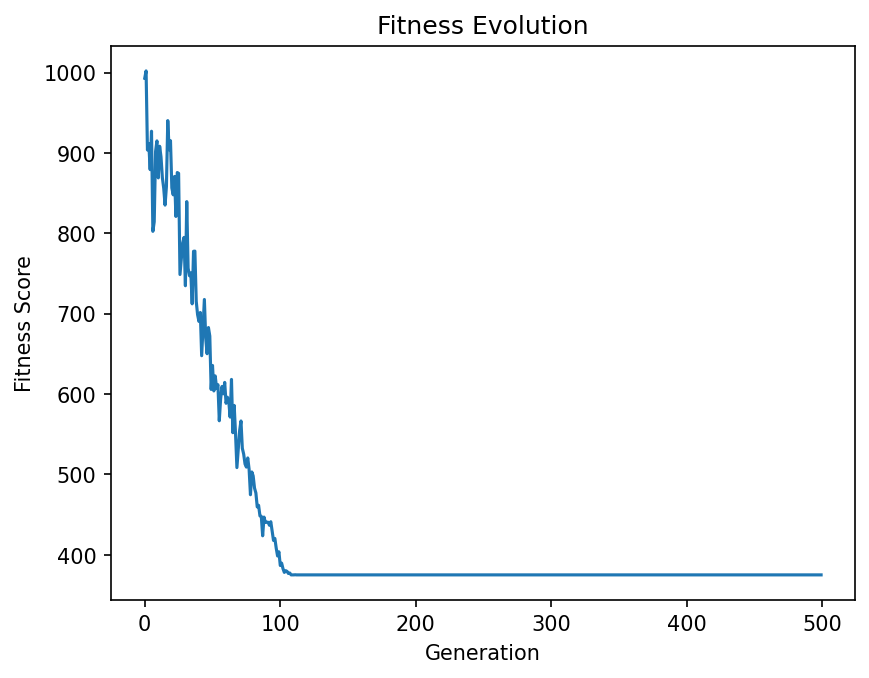

In [81]:
def make_fitness_tracking_plot(fitness_tracking):
    """
    Given a list of fitness scores, plot it versus the generation number
    """
    plt.figure(dpi=150)
    plt.plot(range(len(fitness_tracking)), fitness_tracking)
    plt.ylabel("Fitness Score")
    plt.xlabel("Generation")
    plt.title("Fitness Evolution");

make_fitness_tracking_plot(fitness_tracking)

In [82]:
best_guess

['O',
 'C27',
 'C26',
 'C25',
 'C24',
 'C23',
 'C22',
 'C20',
 'C19',
 'C21',
 'C28',
 'C29',
 'C1',
 'C16',
 'C17',
 'C18',
 'C8',
 'C15',
 'C9',
 'C14',
 'C10',
 'C13',
 'C12',
 'C11',
 'C7',
 'C6',
 'C5',
 'C4',
 'C3',
 'C2',
 'O1']

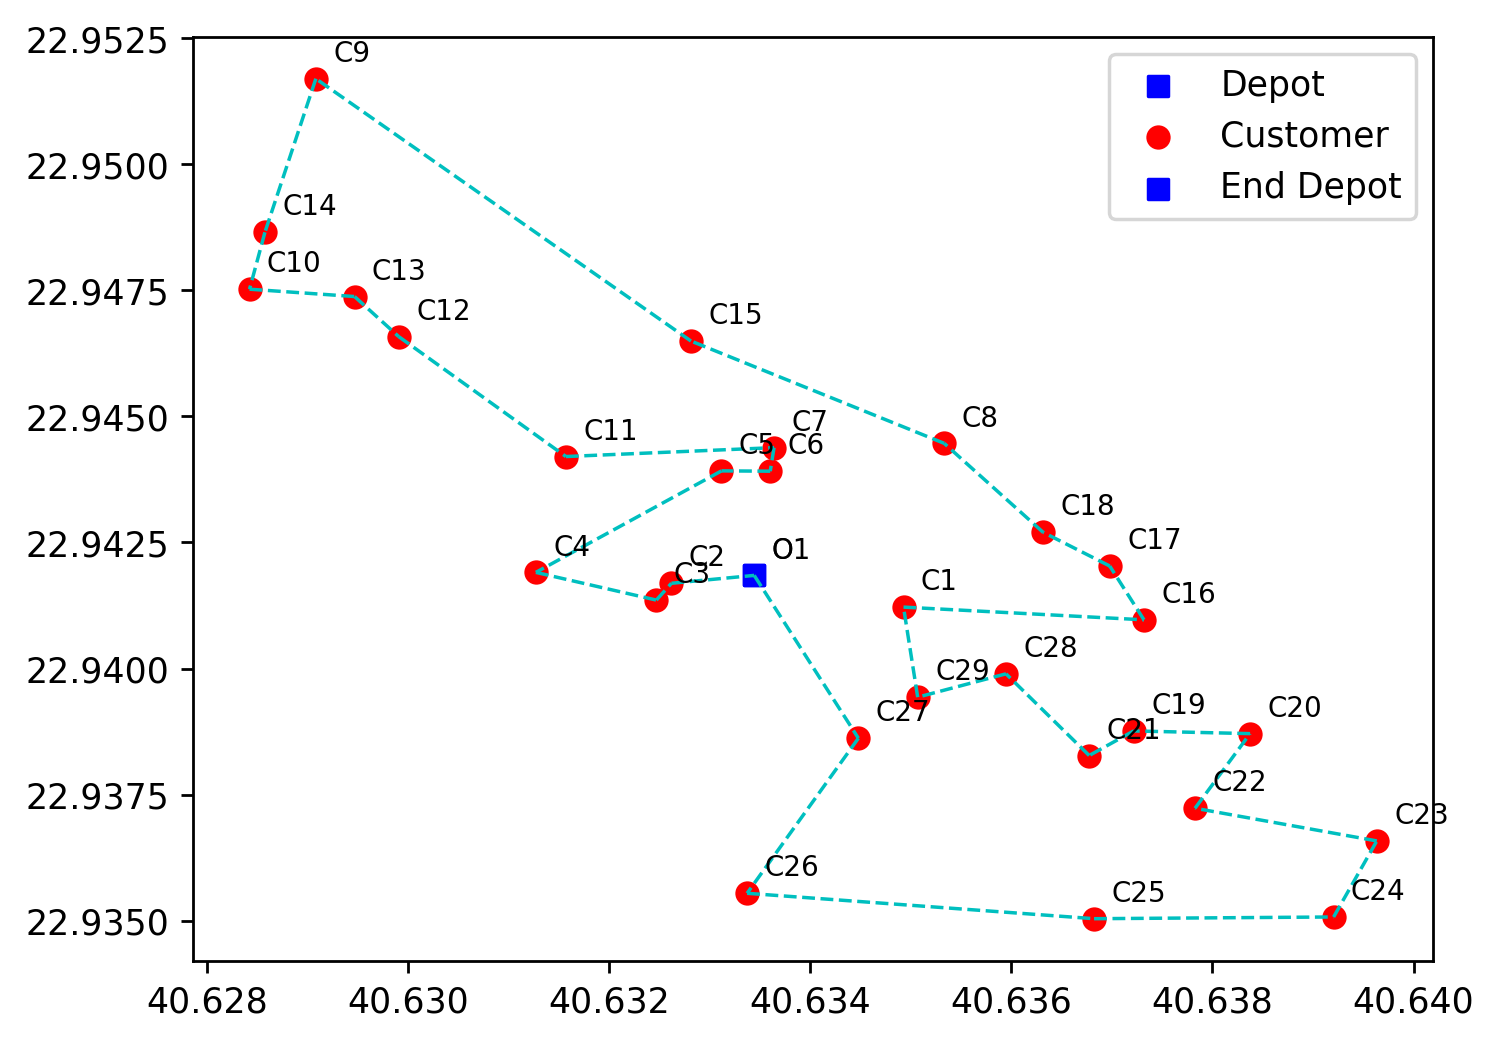

In [83]:
plot_route(coordinates,best_guess,route_in_title=False)

In [84]:
best_guess_energy = calculate_remaining_battery(best_guess,Qm,energy_consumption)
best_guess_times= calculate_departure_times_for_route(best_guess, travel_times)
best_guess_cost = objective_function(best_guess,hourly_wage,energy_cost,travel_times,energy_consumption)

In [85]:
objective_function(['O', 'C27', 'C26', 'C25', 'C24', 'C23', 'C22', 'C20', 'C19', 'C21', 'C28', 'C29', 'C1', 'C16', 'C17', 'C18', 'C8', 'C7', 'C6', 'C5', 'C2', 'C3', 'C4', 'C11', 'C15', 'C9', 'C14', 'C10', 'C13', 'C12', 'O1'],hourly_wage,energy_cost,travel_times,energy_consumption)

387.5305456745466

In [86]:
print(best_guess_energy)
print(best_guess_times)
print(best_guess_cost)

{'O': 756, 'C27': 755.0872721005603, 'C26': 754.2011314389466, 'C25': 753.0095507228839, 'C24': 752.1918458284755, 'C23': 751.7724780253038, 'C22': 751.129399550905, 'C20': 750.7007805819695, 'C19': 750.3032835061842, 'C21': 750.1053741226959, 'C28': 749.5969477442272, 'C29': 749.2722286071046, 'C1': 748.804605354715, 'C16': 747.9812351867698, 'C17': 747.6798283875789, 'C18': 747.3933699205093, 'C8': 746.8234675083222, 'C15': 745.8101593904634, 'C9': 743.9463709702554, 'C14': 743.1345098109366, 'C10': 742.8351884759636, 'C13': 742.4746661227031, 'C12': 742.2190493585705, 'C11': 741.3766789586239, 'C7': 740.6648521043136, 'C6': 740.5426074426313, 'C5': 740.3761622344686, 'C4': 739.5538619606194, 'C3': 739.1183595111567, 'C2': 739.0175140844925, 'O1': 738.7312849894541}
{'O': 0, 'C27': 0.07392479710651179, 'C26': 0.14569303952145615, 'C25': 0.24220036948176968, 'C24': 0.3084252907077354, 'C23': 0.3423898269114516, 'C22': 0.39446526343818117, 'C20': 0.4291795481733232, 'C19': 0.4613723688